In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("smsspamcollection/SMSSpamCollection",sep='\t' ,names=["label", "message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
data["length"] = data["message"].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

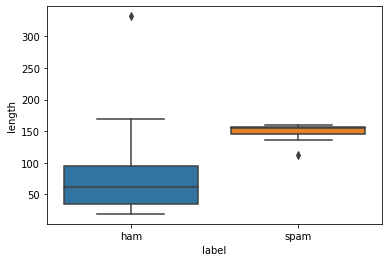

In [7]:
sns.boxplot(x = 'label' ,y = "length" , data = data.sample(60))

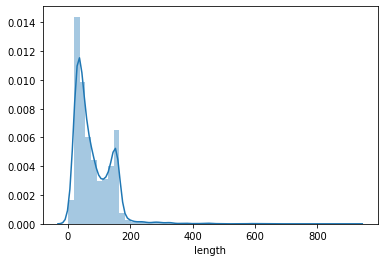

In [8]:
sns.distplot(data["length"] , bins = 50)

In [9]:
data["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
data[data["length"] == data["length"].max()]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd6be61278>,
      dtype=object)

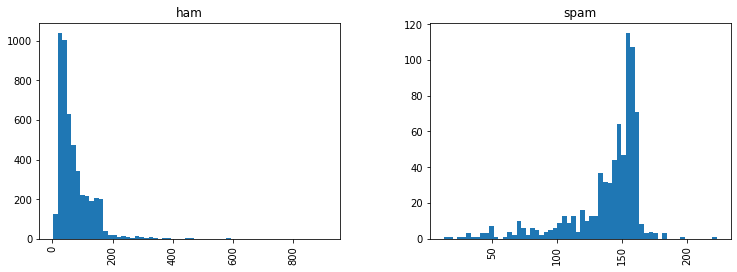

In [11]:
data.hist(column="length" , by="label", bins = 60 ,figsize= (12,4))

In [12]:
import string

mess = 'Sample message! Notice: it has punctuation.'
mess = [i for i in mess if i not in string.punctuation]
mess = "".join(mess)

In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords

In [15]:
mess = [i for i in mess.split(" ") if i.lower() not in stopwords.words('english')]

In [16]:
mess

['Sample', 'message', 'Notice', 'punctuation']

In [17]:
def text_process(mess):
    mess = [i for i in mess if i not in string.punctuation]
    mess = "".join(mess)
    return [i for i in mess.split(" ") if i.lower() not in stopwords.words('english')]

In [18]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
data["message"].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
transformer = CountVectorizer(analyzer=text_process).fit(data['message'])

In [22]:
len(transformer.vocabulary_)

11427

In [23]:
transformer.vocabulary_

{'Go': 2061,
 'jurong': 7556,
 'point': 8919,
 'crazy': 5770,
 'Available': 1111,
 'bugis': 5219,
 'n': 8338,
 'great': 6938,
 'world': 11165,
 'la': 7669,
 'e': 6218,
 'buffet': 5218,
 'Cine': 1484,
 'got': 6907,
 'amore': 4654,
 'wat': 10967,
 'Ok': 3065,
 'lar': 7702,
 'Joking': 2452,
 'wif': 11074,
 'u': 10700,
 'oni': 8592,
 'Free': 1942,
 'entry': 6332,
 '2': 424,
 'wkly': 11125,
 'comp': 5620,
 'win': 11086,
 'FA': 1834,
 'Cup': 1552,
 'final': 6558,
 'tkts': 10514,
 '21st': 444,
 'May': 2805,
 '2005': 431,
 'Text': 3954,
 '87121': 872,
 'receive': 9254,
 'questionstd': 9161,
 'txt': 10688,
 'rateTCs': 9202,
 'apply': 4732,
 '08452810075over18s': 74,
 'U': 4069,
 'dun': 6205,
 'say': 9556,
 'early': 6223,
 'hor': 7187,
 'c': 5262,
 'already': 4630,
 'Nah': 2949,
 'dont': 6124,
 'think': 10435,
 'goes': 6878,
 'usf': 10801,
 'lives': 7843,
 'around': 4778,
 'though': 10452,
 'FreeMsg': 1944,
 'Hey': 2223,
 'darling': 5865,
 '3': 544,
 'weeks': 11013,
 'word': 11152,
 'back': 4894

In [24]:
mess4 = data['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [25]:
bow4 = transformer.transform([mess4])

In [26]:
bow4.shape

(1, 11427)

In [27]:
print(bow4)

  (0, 4069)	2
  (0, 4630)	1
  (0, 5262)	1
  (0, 6205)	1
  (0, 6223)	1
  (0, 7187)	1
  (0, 9556)	2


In [28]:
transformer.get_feature_names()[9556]

'say'

In [29]:
mess_bow = transformer.transform(data['message'])

In [30]:
mess_bow.shape

(5572, 11427)

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
td_transformer = TfidfTransformer()

In [32]:
td_transformer.fit(mess_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [33]:
td_transformer4 = td_transformer.transform(bow4)
print(td_transformer4)

  (0, 9556)	0.5385626262927564
  (0, 7187)	0.4389365653379857
  (0, 6223)	0.3187216892949149
  (0, 6205)	0.29953799723697416
  (0, 5262)	0.29729957405868723
  (0, 4630)	0.26619801906087187
  (0, 4069)	0.40832589933384067


In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(data['message'] , data['label'],test_size= 0.2, random_state = 11)

### Algorithm for classification

In [35]:
from sklearn.naive_bayes import MultinomialNB 

In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [37]:
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fcd69d53a60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [38]:
predictions = pipeline.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(Y_test , predictions)
cm

array([[975,   0],
       [ 48,  92]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test , predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       975
        spam       1.00      0.66      0.79       140

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.88      1115
weighted avg       0.96      0.96      0.95      1115

